In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/refs/heads/main/loan_prediction.csv")

In [54]:
### rows and columns
df.shape

(614, 13)

In [55]:
### Random 10 records
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
175,LP001606,Male,Yes,0,Graduate,No,3497,1964.0,116.0,360.0,1.0,Rural,Y
567,LP002837,Male,Yes,3+,Graduate,No,3400,2500.0,123.0,360.0,0.0,Rural,N
342,LP002119,Male,Yes,1,Not Graduate,No,4554,1229.0,158.0,360.0,1.0,Urban,Y
371,LP002197,Male,Yes,2,Graduate,No,5185,0.0,155.0,360.0,1.0,Semiurban,Y
447,LP002435,Male,Yes,0,Graduate,NaN,3539,1376.0,55.0,360.0,1.0,Rural,N
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
534,LP002731,Female,No,0,Not Graduate,Yes,18165,0.0,125.0,360.0,1.0,Urban,Y
500,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
217,LP001726,Male,Yes,0,Graduate,No,3727,1775.0,131.0,360.0,1.0,Semiurban,Y
508,LP002626,Male,Yes,0,Graduate,Yes,2479,3013.0,188.0,360.0,1.0,Urban,Y


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [57]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [58]:
### Predict whether the loan will be approved or not(Loan_Status)
### Loan_Id (1111111) is insignificant

In [59]:
df=df.drop("Loan_ID",axis=1) #axis=1 rep column

In [60]:
df.shape

(614, 12)

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

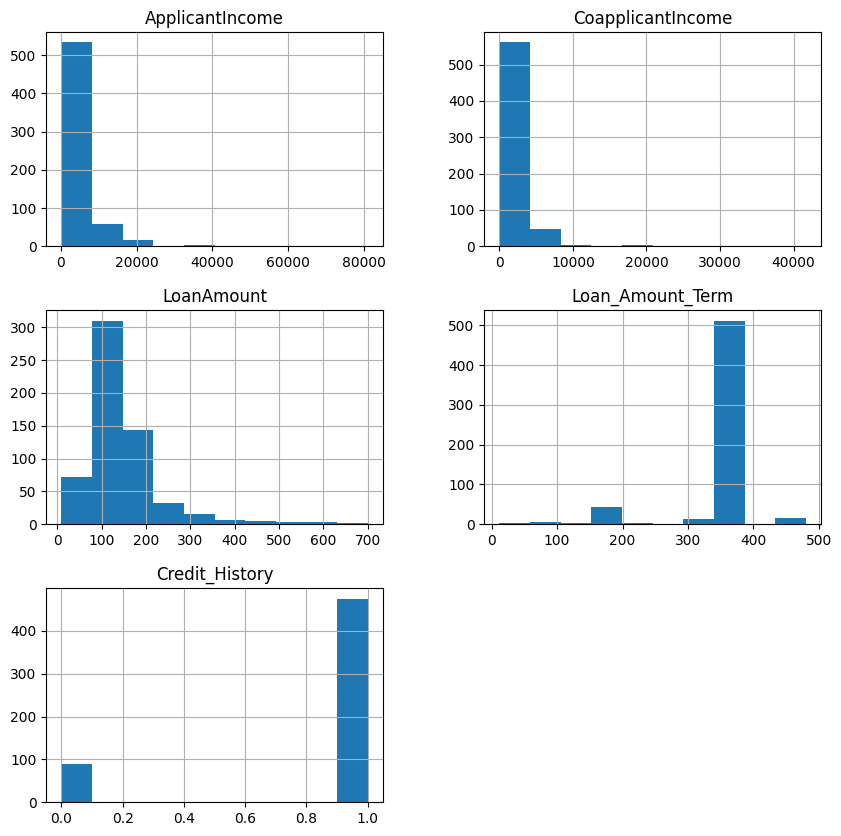

In [61]:
### histogram
df.hist(figsize=(10,10))

In [62]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [63]:
df.describe(include="all")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [64]:
### Boxplot for all numerical columns
### Boxplot for Loan_Status Vs all numerical
### countplot for Loan_Status Vs all categorical columns

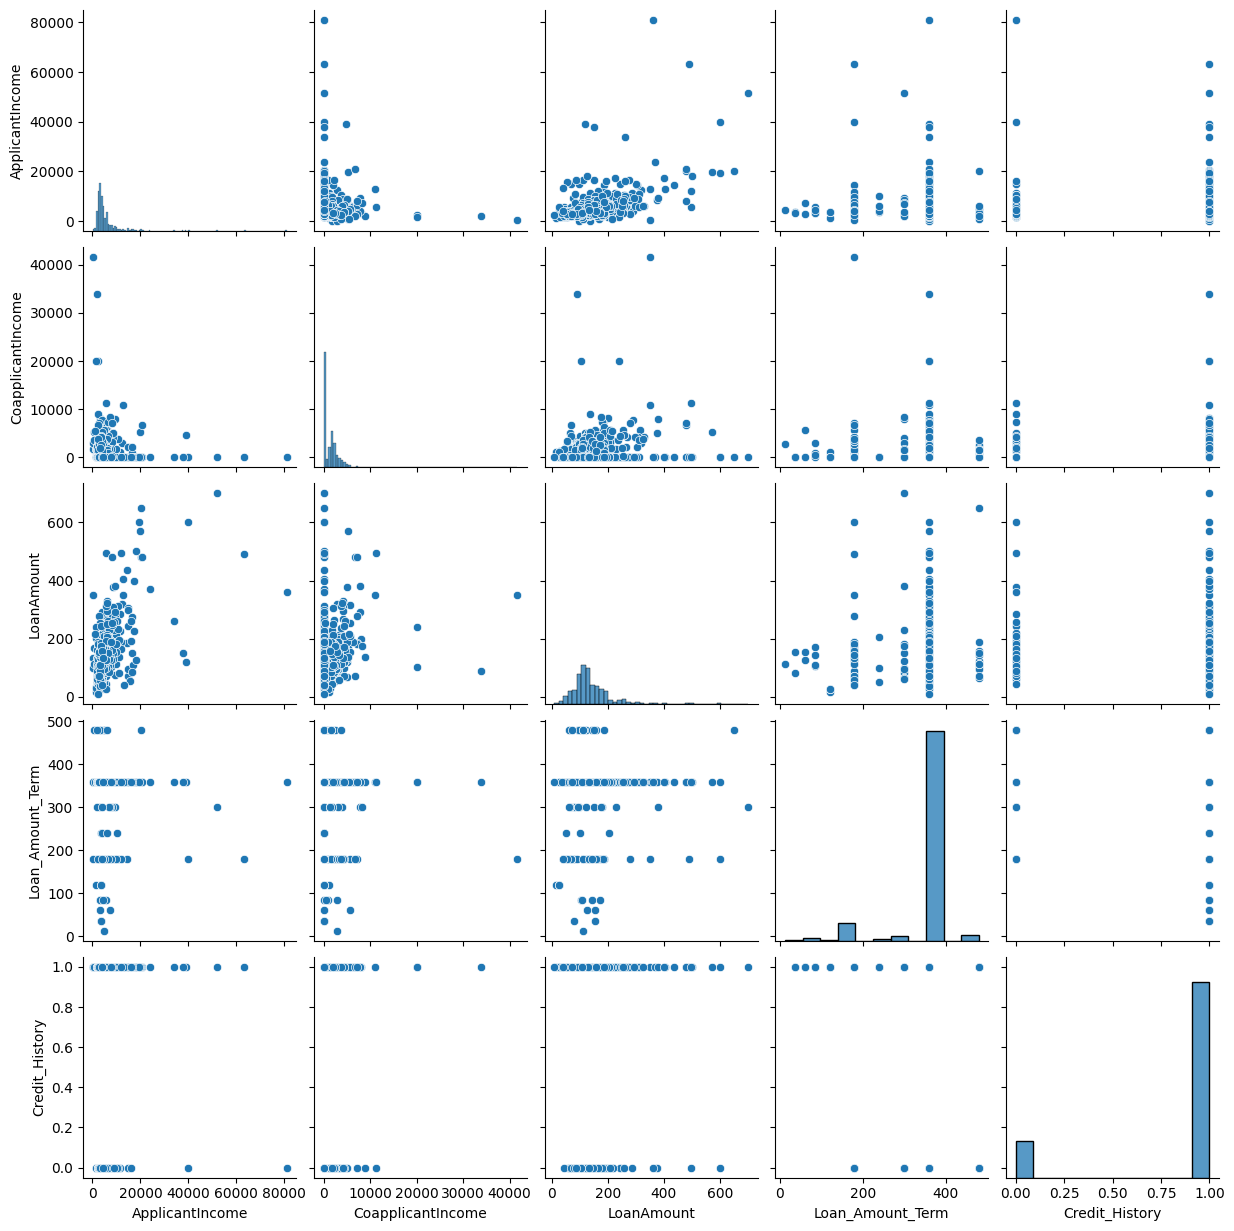

In [65]:
### Pairplot
sns.pairplot(df)

In [66]:
df.corr(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [68]:
614-592

22

In [69]:
### Replace the missing values

In [70]:
med_loanamount=df["LoanAmount"].median()
med_loanamount

128.0

In [71]:
df["LoanAmount"]=df["LoanAmount"].replace(np.nan,med_loanamount)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [73]:
### Do for loan amount term
### Do for credit history

In [74]:
med_Loan_Amount_Term=df["Loan_Amount_Term"].median()
med_Loan_Amount_Term

360.0

In [75]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].replace(np.nan,med_Loan_Amount_Term)

In [76]:
med_Credit_History=df["Credit_History"].median()
med_Credit_History

1.0

In [77]:
df["Credit_History"]=df["Credit_History"].replace(np.nan,med_Credit_History)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [79]:
mode_gender=df["Gender"].mode()[0]
mode_gender

'Male'

In [80]:
df["Gender"]=df["Gender"].replace(np.nan,mode_gender)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [82]:
### Married,Dependents,Selfemployed

In [83]:
mode_married=df["Married"].mode()[0]
mode_married

'Yes'

In [84]:
df["Married"]=df["Married"].replace(np.nan,mode_married)

In [85]:
mode_dep=df["Dependents"].mode()[0]
mode_dep

'0'

In [86]:
df["Dependents"]=df["Dependents"].replace(np.nan,mode_dep)

In [87]:
mode_self=df["Self_Employed"].mode()[0]
mode_self

'No'

In [88]:
df["Self_Employed"]=df["Self_Employed"].replace(np.nan,mode_self)

In [89]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [90]:
### Drop insignificant column
### Replace missing values


In [91]:
### Text-> Gender,Married,Self)employed...categ

In [92]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [93]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Apply label encoding
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

display(df.head())

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [95]:
### ML: No insig,No missing values,no catego

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification
Y=df[["Loan_Status"]]
X=df.drop(["Loan_Status"],axis=1)

In [97]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [98]:
model_lr=LogisticRegression()

In [99]:
model_lr.fit(X_train,Y_train)

LogisticRegression()

In [100]:
model_lr.score(X_train,Y_train)

0.8181818181818182

In [101]:
model_lr.score(X_test,Y_test)

0.7945945945945946

In [102]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier()
model_knn.fit(X_train,Y_train)
print(model_knn.score(X_train,Y_train))
print(model_knn.score(X_test,Y_test))

0.7482517482517482
0.6108108108108108


In [103]:
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(X_train,Y_train)
print(model_svc.score(X_train,Y_train))
print(model_svc.score(X_test,Y_test)) #underfitting

0.6923076923076923
0.6864864864864865


In [111]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(max_depth=3)
model_dt.fit(X_train,Y_train)
print(model_dt.score(X_train,Y_train))
print(model_dt.score(X_test,Y_test)) #overfitting

0.8205128205128205
0.7891891891891892


In [138]:
from sklearn.ensemble import BaggingClassifier
model_bag=BaggingClassifier(max_samples=0.05)
model_bag.fit(X_train,Y_train)
print(model_bag.score(X_train,Y_train))
print(model_bag.score(X_test,Y_test))

0.8205128205128205
0.7891891891891892


In [142]:
from sklearn.ensemble import AdaBoostClassifier
model_abc=AdaBoostClassifier()
model_abc.fit(X_train,Y_train)
print(model_abc.score(X_train,Y_train))
print(model_abc.score(X_test,Y_test))

0.8181818181818182
0.7837837837837838


In [151]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc=GradientBoostingClassifier(max_depth=3,learning_rate=0.025)
model_gbc.fit(X_train,Y_train)
print(model_gbc.score(X_train,Y_train))
print(model_gbc.score(X_test,Y_test))

0.8275058275058275
0.7783783783783784


In [152]:
from sklearn.ensemble import RandomForestClassifier
model_rfc=RandomForestClassifier(max_depth=3)
model_rfc.fit(X_train,Y_train)
print(model_rfc.score(X_train,Y_train))
print(model_rfc.score(X_test,Y_test))

0.8205128205128205
0.7891891891891892




| Algorithm          | Hyperparameter      | Typical Range                | Explanation                                                               |
| ------------------ | ------------------- | ---------------------------- | ------------------------------------------------------------------------- |
| **KNN**            | `n_neighbors`       | 1 – 50                       | Number of neighbors to consider; lower = more flexible, higher = smoother |
|                    | `weights`           | 'uniform', 'distance'        | How to weight neighbors; 'distance' gives closer points more influence    |
|                    | `p`                 | 1 (Manhattan), 2 (Euclidean) | Distance metric used in calculation                                       |
| **SVM (SVC)**      | `C`                 | 0.01 – 1000                  | Regularization; lower = more margin, higher = less misclassification      |
|                    | `kernel`            | 'linear', 'rbf', 'poly'      | Type of kernel function to transform data                                 |
|                    | `gamma`             | 'scale', 'auto', 0.001–1     | Controls the influence of individual training examples                    |
| **Decision Tree**  | `max_depth`         | 1 – None                     | Limits tree depth to avoid overfitting                                    |
|                    | `min_samples_split` | 2 – 20                       | Minimum samples required to split a node                                  |
|                    | `criterion`         | 'gini', 'entropy'            | Function used to measure the quality of a split                           |
| **Bagging**        | `n_estimators`      | 10 – 500                     | Number of base learners (e.g., trees) in the ensemble                     |
|                    | `max_samples`       | 0.5 – 1.0                    | Fraction of training data to sample per learner                           |
|                    | `bootstrap`         | True, False                  | Whether sampling is with replacement                                      |
| **AdaBoost**       | `n_estimators`      | 50 – 500                     | Number of boosting rounds                                                 |
|                    | `learning_rate`     | 0.01 – 1.0                   | Shrinks the contribution of each classifier                               |
|                    | `algorithm`         | 'SAMME', 'SAMME.R'           | SAMME.R uses probabilities; generally better performance                  |
| **Gradient Boost** | `n_estimators`      | 100 – 1000                   | Number of boosting stages to perform                                      |
|                    | `learning_rate`     | 0.01 – 0.3                   | Controls step size in updating model                                      |
|                    | `max_depth`         | 3 – 10                       | Depth of individual trees (controls complexity)                           |
| **Random Forest**  | `n_estimators`      | 100 – 1000                   | Number of decision trees                                                  |
|                    | `max_depth`         | 5 – None                     | Maximum depth of each tree                                                |
|                    | `max_features`      | 'sqrt', 'log2', None         | Number of features to consider at each split                              |




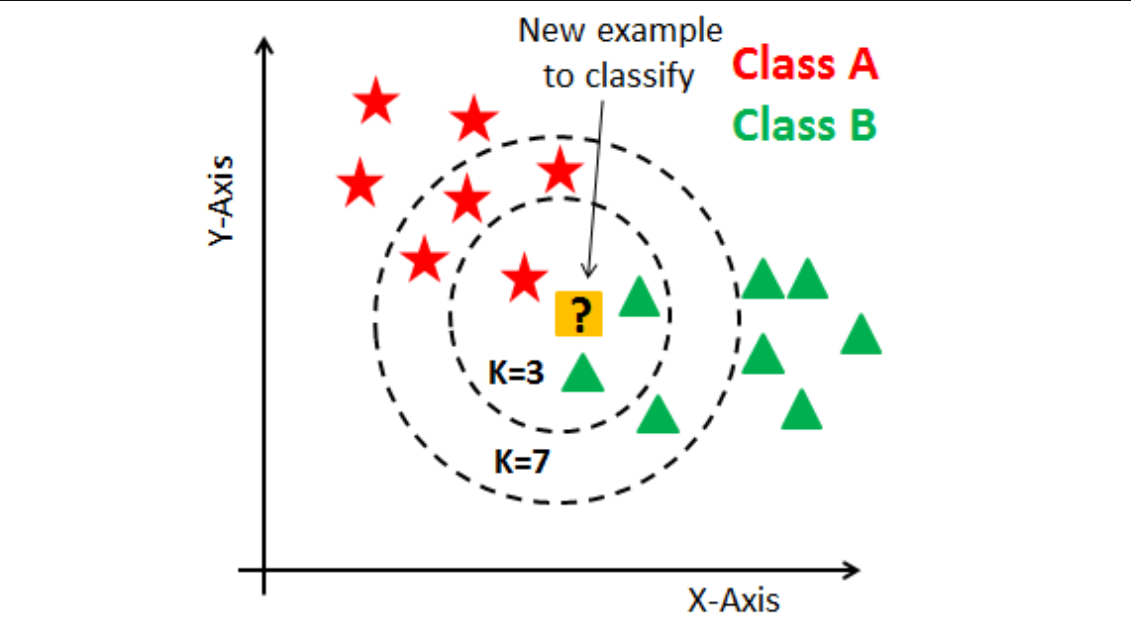

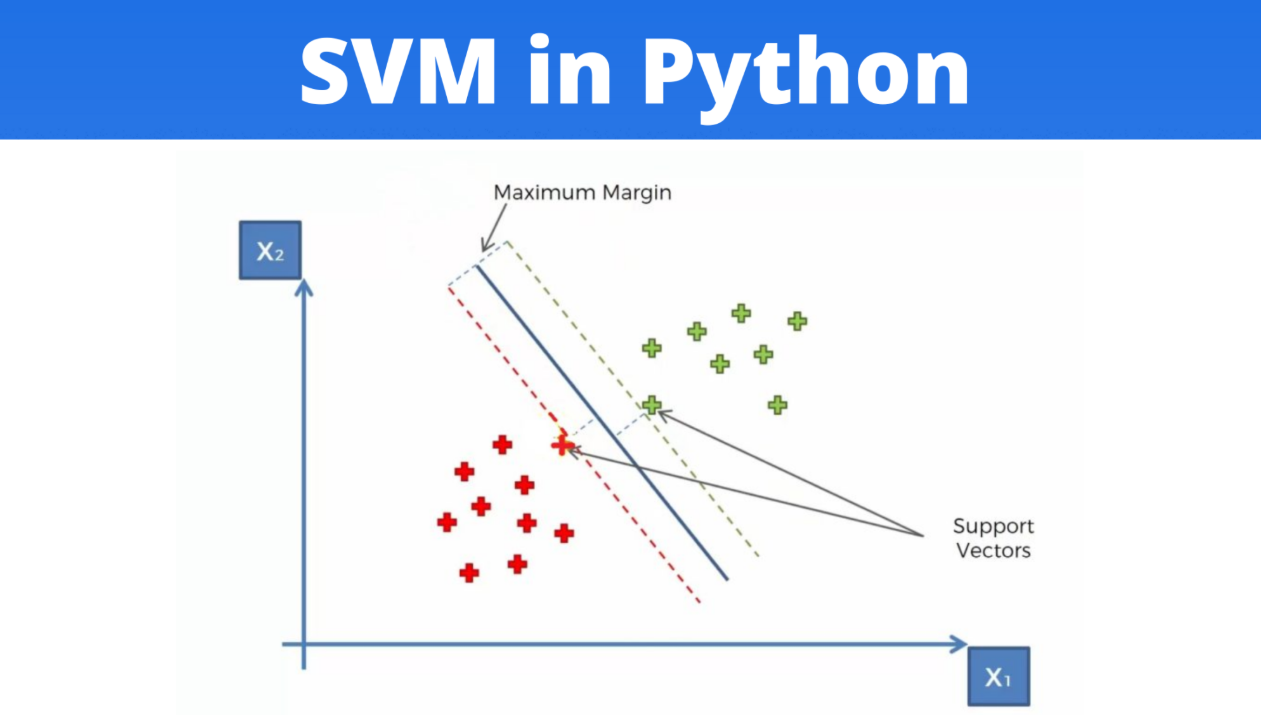